# Heart Disease Prediction and EDA

### **Table of Contents**
* [<span style="color:#A690A4"> 0. Executive Summary](#exe_sum)
* [<span style="color:#A690A4"> 1. Introduction](#intro)
* [<span style="color:#A690A4"> 2. Collect, Wrangle & Explore Data](#process)
* [<span style="color:#A690A4"> 3. Predict Asking Price](#predict)
* [<span style="color:#A690A4"> 4. Conclusion](#conclusion)

# <span style="color:#5E6997">Executive Summary</span> <a class="anchor" id="exe_sum"></a>

# <span style="color:#5E6997">Introduction</span> <a class="anchor" id="intro"></a>

Determining which features to analyze involves focusing on their **relevance to the target variable** (`HadHeartAttack`) while considering their statistical, medical, or logical relationship. Here's how you can prioritize features for analysis and preprocessing:

---

#### 1. **Direct Medical Relevance**
   Features directly related to heart attack risk based on medical knowledge are high-priority. These include:
   - **HadAngina**: Angina is a symptom of coronary heart disease, strongly associated with heart attacks.
   - **HadStroke**: Stroke shares many risk factors with heart attacks.
   - **HadCOPD**: Chronic obstructive pulmonary disease is associated with cardiovascular issues.
   - **HadDiabetes**: Diabetes is a known risk factor for heart disease.
   - **BMI, PhysicalActivities, SmokerStatus, AlcoholDrinkers**: Lifestyle factors strongly correlated with cardiovascular health.
   - **AgeCategory, Sex**: Demographics highly predictive of heart disease.

#### 2. **Comorbid Conditions**
   Features that capture comorbidities or associated health issues:
   - **HadDepressiveDisorder**: Depression is linked to heart disease through stress and inflammation.
   - **HadKidneyDisease**: Kidney disease can contribute to heart conditions.
   - **GeneralHealth**: Self-reported health status often reflects multiple underlying conditions.

#### 3. **Behavioral and Preventive Health**
   Features that reflect health-seeking behaviors or preventive measures:
   - **LastCheckupTime**: Regular checkups may reduce heart attack risk through early intervention.
   - **FluVaxLast12, PneumoVaxEver, TetanusLast10Tdap**: Proxy for health awareness or regular healthcare access.
   - **ChestScan**: May indicate a history of lung or cardiovascular screening.

#### 4. **Disabilities and Functional Limitations**
   These features capture physical challenges that may be proxies for poor cardiovascular health:
   - **DifficultyWalking**: A strong indicator of reduced mobility, often associated with heart conditions.
   - **DifficultyConcentrating, DifficultyErrands**: Proxy for severe health or neurological issues.

#### 5. **Statistical Considerations**
   Features with significant variation or imbalance may require adjustments:
   - **State**: May add little predictive power unless there’s geographic disparity in heart attack prevalence.
   - **CovidPos**: Analyze if post-COVID complications affect heart attack risk.

#### 6. **Feature Engineering Opportunities**
   Create derived features or group similar ones:
   - Combine **HeightInMeters** and **WeightInKilograms** into **BMI** (already included).
   - Create an **Exercise Regularity** feature from `PhysicalActivities` and `SleepHours`.
   - Combine comorbidity indicators (`HadDiabetes`, `HadCOPD`, etc.) into a **Comorbidity Index**.

#### 7. **Correlation with Target Variable**
   Use a **correlation matrix** or statistical tests (e.g., chi-square for categorical variables, ANOVA for numeric variables) to identify features with the strongest relationships to `HadHeartAttack`.

#### 8. **Class Imbalance**
   Check if `HadHeartAttack` is imbalanced (e.g., many more "No" than "Yes"). If so, focus on features with strong predictive power to address the imbalance during modeling.



# <span style="color:#5E6997">Collect, Wrangle, and Explore Data</span> <a class="anchor" id="process"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na option is deprecated.*")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         9.0            Non

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

## Display Unique Values for Each Column

In [4]:
# Iterate through each column and process based on data type
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical variables
        unique_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Unique Values: {unique_values}\n")
    else:  # Numeric variables
        col_min = df[column].min()
        col_max = df[column].max()
        print(f"Column: {column}")
        print(f"Range: {col_min} to {col_max}\n")

Column: State
Unique Values: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Column: Sex
Unique Values: ['Female' 'Male']

Column: GeneralHealth
Unique Values: ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']

Column: PhysicalHealthDays
Range: 0.0 to 30.0

Column: MentalHealthDays
Range: 0.0 to 30.0

Column: LastCheckupTime
Unique Values: ['Within past year (anytime less than 12 months ago)'
 '5 or mor

## Description of Each Feature

Here’s a brief rundown of what each column in the dataset represents:

`State` - State FIPS Code\
`Sex` - Sex of Respondent\
`GeneralHealth` - Would you say that in general your health is:\
`PhysicalHealthDays` - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?\
`MentalHealthDays` - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?\
`LastCheckupTime` - About how long has it been since you last visited a doctor for a routine checkup?\
`PhysicalActivities` - During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?\
`SleepHours` - On average, how many hours of sleep do you get in a 24-hour period?\
`RemovedTeeth` - Not including teeth lost for injury or orthodontics, how many of your permanent teeth have been removed because of tooth decay or gum disease?\
`HadHeartAttack` - (Ever told) you had a heart attack, also called a myocardial infarction?\
`HadAngina` - (Ever told) (you had) angina or coronary heart disease?\
`HadStroke` - (Ever told) (you had) a stroke.\
`HadAsthma` - (Ever told) (you had) asthma?\
`HadSkinCancer` - (Ever told) (you had) skin cancer that is not melanoma?\
`HadCOPD` - (Ever told) (you had) C.O.P.D. (chronic obstructive pulmonary disease), emphysema or chronic bronchitis?\
`HadDepressiveDisorder` - (Ever told) (you had) a depressive disorder (including depression, major depression, dysthymia, or minor depression)?\
`HadKidneyDisease` - Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?\
`HadArthritis` - (Ever told) (you had) some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia?  (Arthritis diagnoses include: rheumatism, polymyalgia rheumatica; osteoarthritis (not osteporosis); tendonitis, bursitis, bunion, tennis elbow; carpal tunnel syndrome, tarsal tunnel syndrome; joint infection, etc.)\
`HadDiabetes` - (Ever told) (you had) diabetes?\
`DeafOrHardOfHearing` - Are you deaf or do you have serious difficulty hearing?\
`BlindOrVisionDifficulty` - Are you blind or do you have serious difficulty seeing, even when wearing glasses?\
`DifficultyConcentrating` - Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions?\
`DifficultyWalking` - Do you have serious difficulty walking or climbing stairs?\
`DifficultyDressingBathing` - Do you have difficulty dressing or bathing?\
`DifficultyErrands` - Because of a physical, mental, or emotional condition, do you have difficulty doing errands alone such as visiting a doctor´s office or shopping?\
`SmokerStatus` - Four-level smoker status:  Everyday smoker, Someday smoker, Former smoker, Non-smoker\
`ECigaretteUsage` - Would you say you have never used e-cigarettes or other electronic vaping products in your entire life or now use them every day, use them some days, or used them in the past but do not currently use them at all?\
`ChestScan` - Have you ever had a CT or CAT scan of your chest area?\
`RaceEthnicityCategory` - Five-level race/ethnicity category\
`AgeCategory` - Fourteen-level age category\
`HeightInMeters` - Reported height in meters\
`WeightInKilograms` - Reported weight in kilograms\
`BMI` - Body Mass Index (BMI)\
`AlchoholDrinkers` - Adults who reported having had at least one drink of alcohol in the past 30 days.\
`HIVTesting` - Adults who have ever been tested for HIV\
`FluVaxLast12` - During the past 12 months, have you had either flu vaccine that was sprayed in your nose or flu shot injected into your arm?\
`PneumoVaxEver` - Have you ever had a pneumonia shot also known as a pneumococcal vaccine?\
`TetanusLast10Tdap` - Have you received a tetanus shot in the past 10 years? Was this Tdap, the tetanus shot that also has pertussis or whooping cough vaccine?\
`HighRiskLastYear` - You have injected any drug other than those prescribed for you in the past year. You have been treated for a sexually transmitted disease or STD in the past year. You have given or received money or drugs in exchange for sex in the past year.\
`CovidPos` - Has a doctor, nurse, or other health professional ever told you that you tested positive for COVID 19?


## Remove Outliers

In [5]:
# TODO: 

## Define Categorical Columns

In [6]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

## Plot the Distribution of Unique Values for each Categorical Variable¶

Note that some graphs have been oriented horizontally to make room for their Category names.

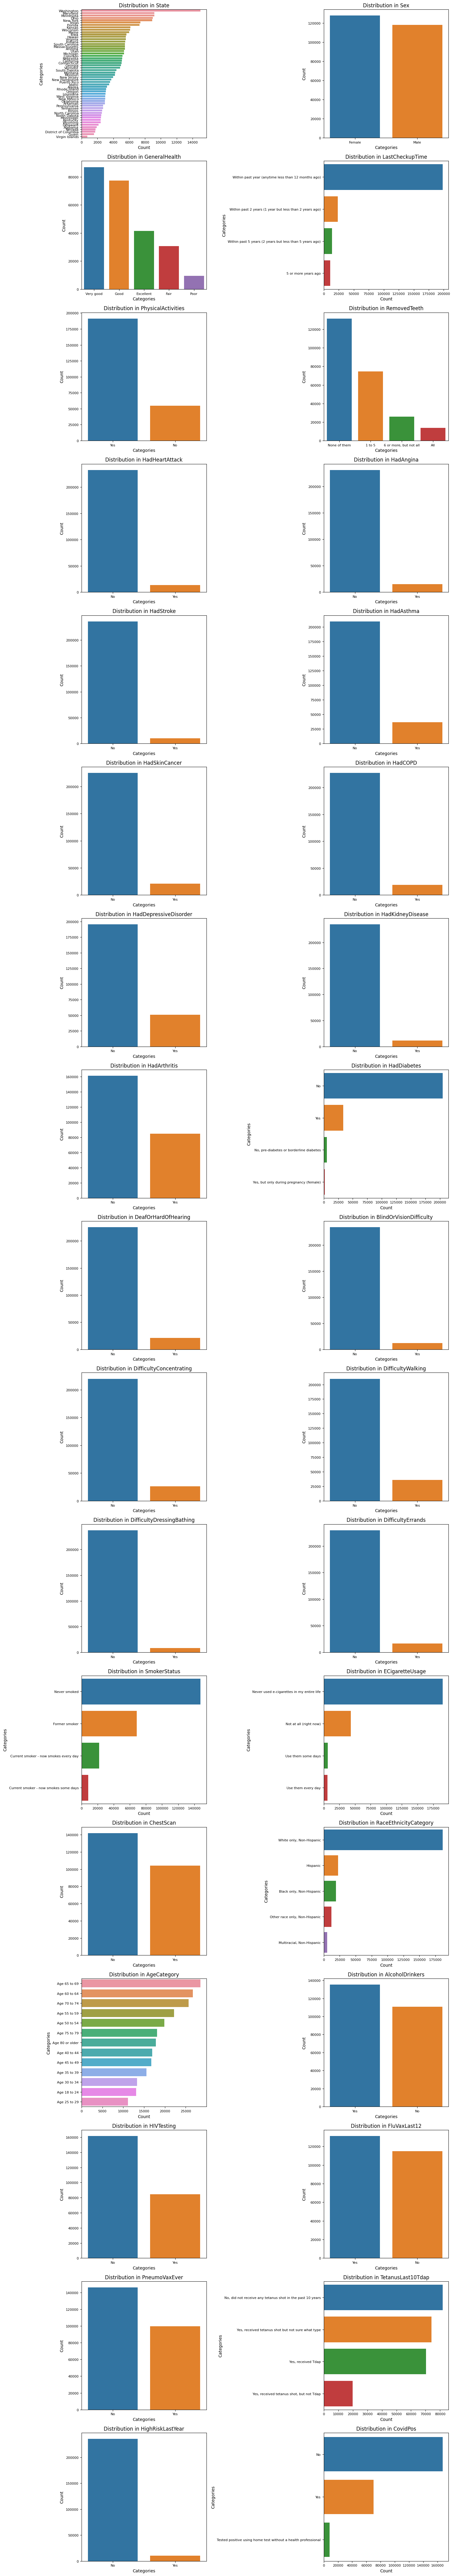

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# List of columns to orient horizontally
horizontal_columns = [
    'State', 'LastCheckupTime', 'HadDiabetes', 
    'SmokerStatus', 'ECigaretteUsage',  
    'RaceEthnicityCategory', 'AgeCategory', 'TetanusLast10Tdap', 'CovidPos'
]

# Number of columns per row for the grid
plots_per_row = 2

# Calculate the number of rows needed
num_categories = len(categorical_columns)
num_rows = math.ceil(num_categories / plots_per_row)

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 5))

# Flatten axes array if more than one row, or wrap in a list if only one row
if num_rows == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# Plot the distribution of unique values for each categorical variable
for idx, column in enumerate(categorical_columns):
    value_counts = df[column].value_counts()
    
    # Check if the column should be horizontal
    if column in horizontal_columns:
        sns.barplot(y=value_counts.index, x=value_counts.values, ax=axes[idx])  # Horizontal bar plot
        axes[idx].set_ylabel('Categories', fontsize=10)
        axes[idx].set_xlabel('Count', fontsize=10)
    else:
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[idx])  # Vertical bar plot
        axes[idx].set_xlabel('Categories', fontsize=10)
        axes[idx].set_ylabel('Count', fontsize=10)
    
    # Set title and tick sizes
    axes[idx].set_title(f'Distribution in {column}', fontsize=12)
    axes[idx].tick_params(axis='y', labelsize=8)
    axes[idx].tick_params(axis='x', labelsize=8)

# Hide unused subplots if any
for idx in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()


## Categorical Feature Improvements Based on Graphs 
Improving the performance of features in the models can be achieved by addressing issues related to data quality, feature engineering, and preprocessing. Here are some specific ideas for the features:


**1. Address Imbalanced Distributions**
For features where one category dominates (e.g., health conditions like `HadHeartAttack`, `HadStroke`, `DifficultyWalking`):
- **Rebalancing Techniques:**
  - Use techniques like undersampling the majority class.
  - Assign higher class weights in models to penalize misclassification of the minority class.
- **Feature Transformation:**
  - Aggregate similar categories into a binary or reduced set of classes (e.g., combine categories in `HadDiabetes` into "Yes" vs. "No" groups).


**2. Handle Categorical Features Effectively**
To improve their predictive power:
- **Encoding Methods:**
  - ✅ Use **one-hot encoding** for nominal categories (e.g., `RaceEthnicityCategory` or `State`).
  - ✅ Apply **ordinal encoding** for ordinal features (e.g., `GeneralHealth` and `AgeCategory`).
  - ✅ Experiment with **target encoding** for high cardinality features like `State` if there is a clear relationship with the target variable.
- **Feature Reduction:**
  - For high-cardinality features (e.g., `State`), consider grouping less frequent categories into an "Other" category to reduce noise and sparsity.


**3. Handle Missing and Rare Categories**
Rare categories in features like `ECigaretteUsage` and `TetanusLast10Tdap` can create noise:
- Combine rare categories or reassign them to a broader category (e.g., "Used occasionally").


**4. Feature Interactions**
Certain features may not perform well on their own but could have a strong impact when combined:
- **Create Interaction Features:**
  - Combine related features (e.g., `PhysicalActivities` and `GeneralHealth`) to capture interdependencies.
  - Use domain knowledge to create meaningful interactions (e.g., `AgeCategory` × `HadHeartAttack`).
- **Polynomial Features:**
  - For features with potential nonlinear relationships, generate polynomial features or use tree-based models that can capture interactions directly.

---

**5. Feature Scaling and Transformation**
For models sensitive to feature scaling (e.g., logistic regression or SVMs):
- Apply scaling techniques like standardization or min-max scaling to features like `AgeCategory`.

---

**6. Feature Selection**
Identify the most relevant features for your model to reduce noise:
- Use feature importance scores from tree-based models (e.g., Random Forest, XGBoost) or statistical tests (e.g., chi-squared for categorical features).
- Perform dimensionality reduction techniques like PCA or mutual information to identify and retain the most important features.

---

**7. Address Potential Multicollinearity**
Some features may overlap conceptually (e.g., `GeneralHealth` and `PhysicalActivities` or `SmokerStatus` and `ECigaretteUsage`). This can negatively impact models like logistic regression:
- Use correlation matrices or variance inflation factor (VIF) analysis to identify multicollinearity.
- Drop one of the redundant features if necessary or combine them.

---

**8. Model-Specific Approaches**
Optimize features based on the model you are using:
- **Tree-Based Models (e.g., Random Forest, XGBoost):**
  - These models handle categorical data and imbalances well but may benefit from better binning or interaction terms.
- **Linear Models (e.g., Logistic Regression):**
  - Ensure proper scaling and encoding.
  - Experiment with regularization (L1 or L2) to reduce overfitting.
- **Neural Networks:**
  - Normalize inputs, and use embedding layers for high-cardinality features like `State`.

---

**9. Domain-Specific Improvements**
Leverage domain knowledge to create features that are more predictive:
- Combine time-related features like `LastCheckupTime` with `GeneralHealth` to create a "Proactive Health Score."
- Use population-weighted state data (e.g., average health index for each state) as a new feature.

---

**10. Feature Engineering for Specific Use Cases**
Tailor feature transformations to the problem you are solving:
- For **classification problems**, balance and encode categories effectively.
- For **ranking or regression problems**, use domain-specific transformations like scaling age categories to represent chronological intervals.

---

By applying these strategies, I can improve the predictive power and performance of the features in the models. I will also validate any changes through cross-validation to ensure they generalize well.

## Numerical Feature Distribution

In [8]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

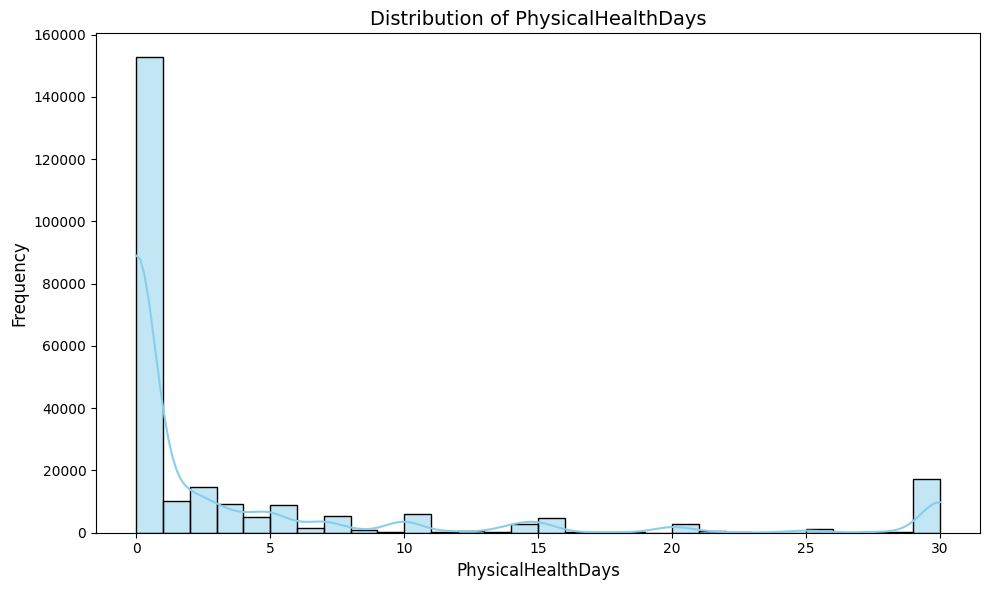

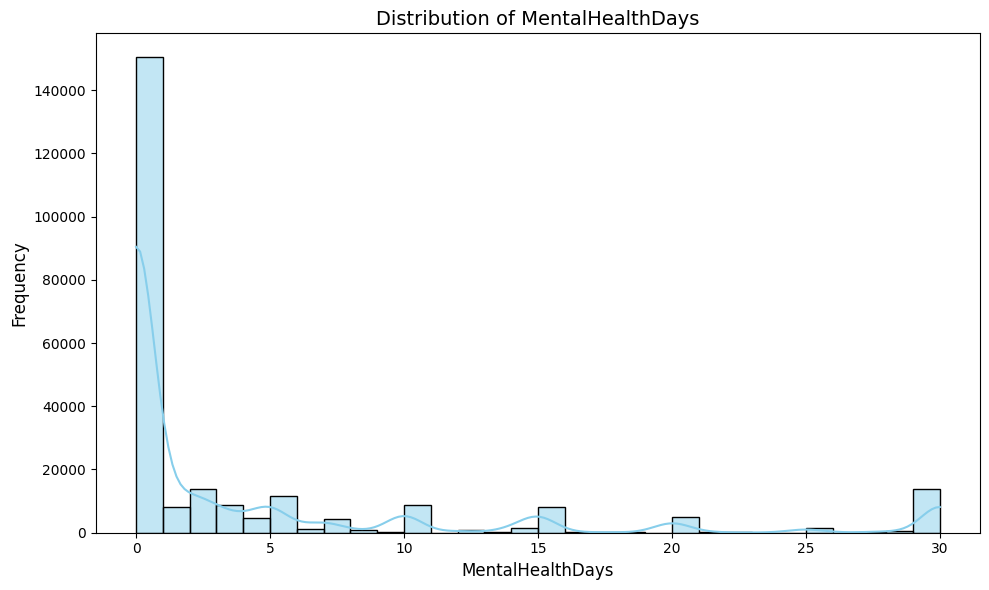

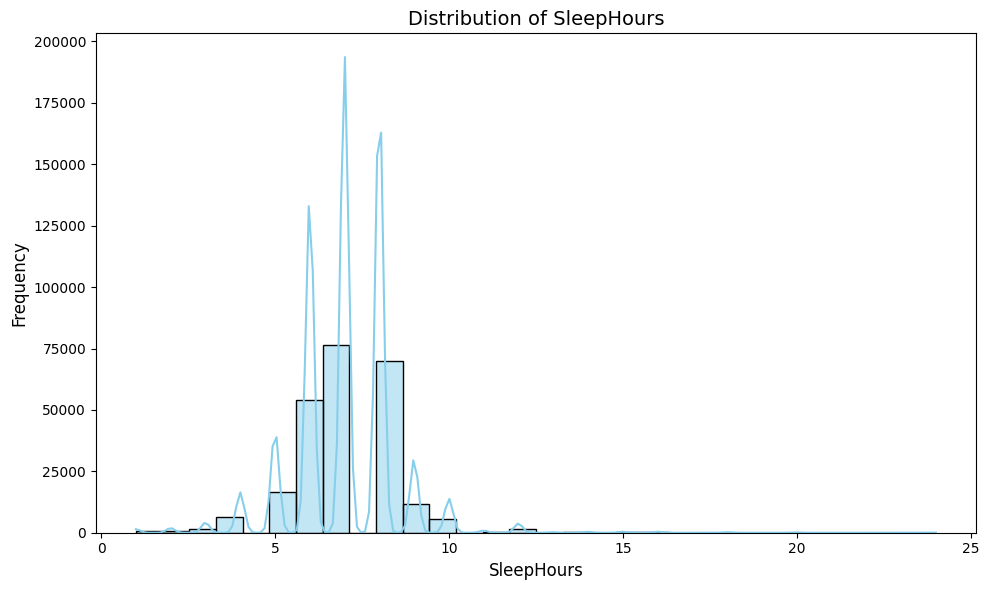

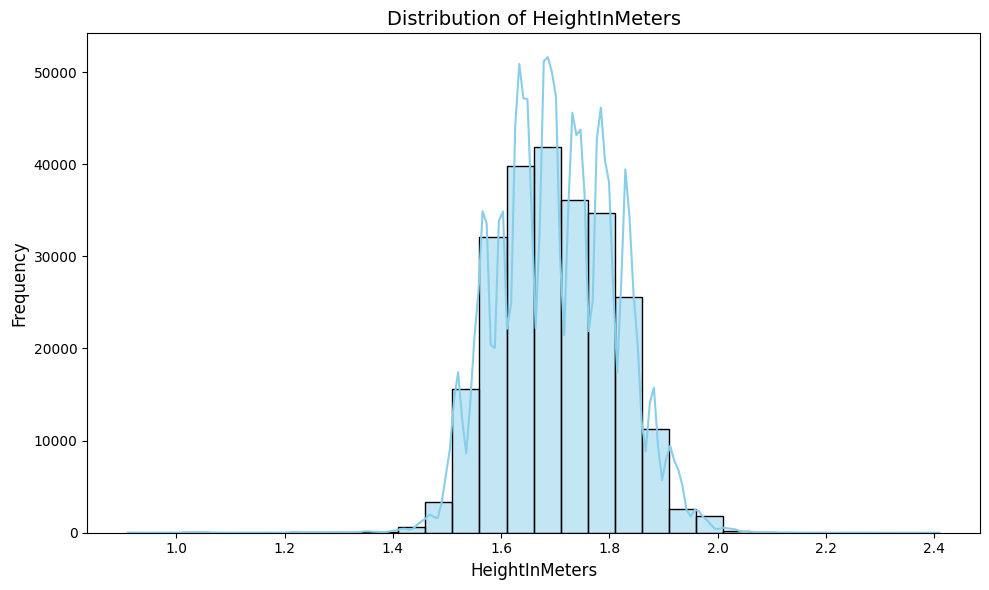

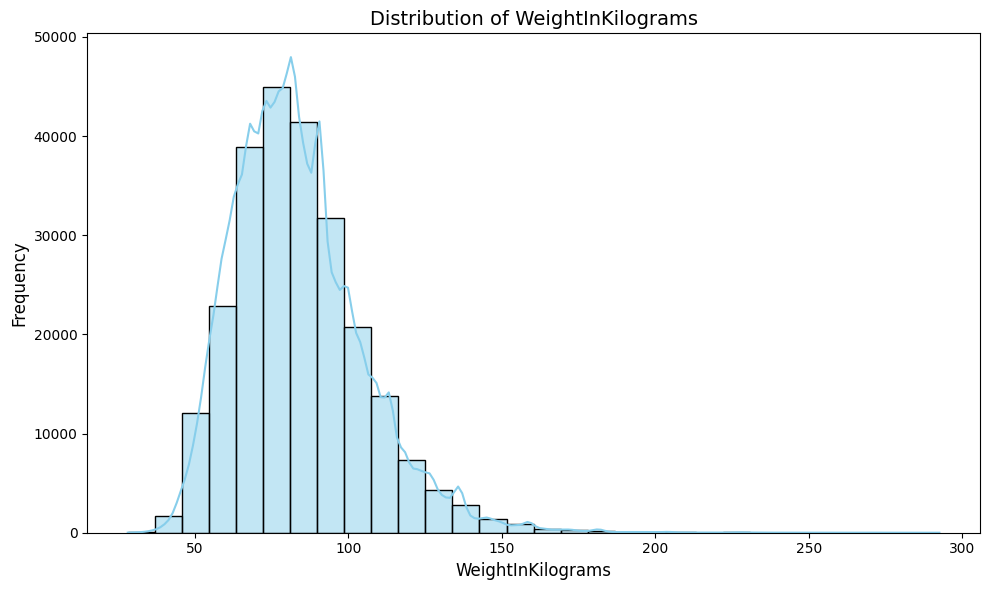

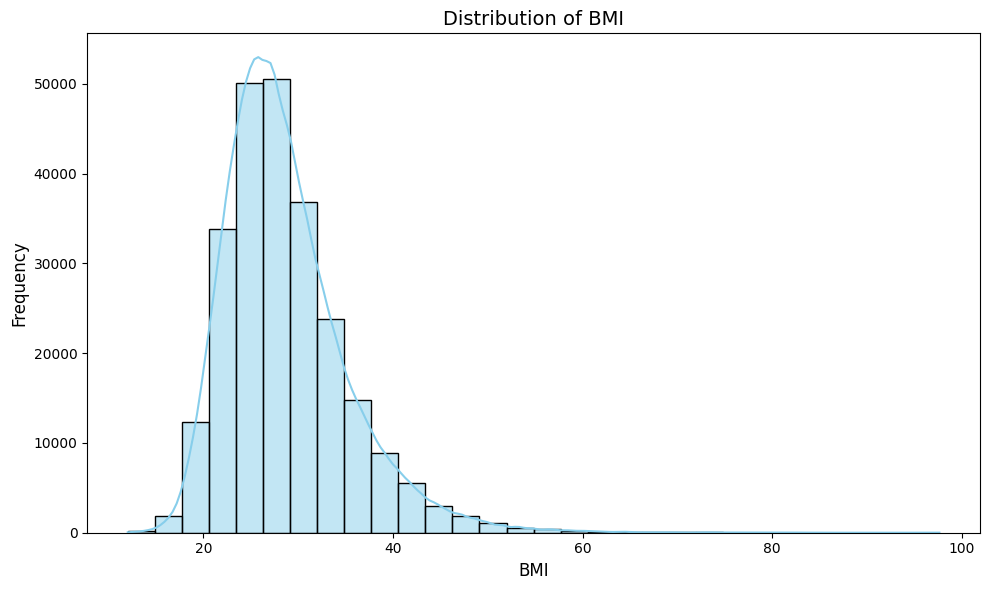

In [9]:
# Plot the distribution of each numerical variable and save each graph as a PNG file
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    
    # Save the plot to a PNG file
    # filename = f'num_dist_{column}.png'
    # plt.savefig(filename, dpi=300)
    
    # Show the plot
    plt.show()

## Numerical Feature Improvements Based on Graphs

1. **WeightInKilograms**
   - **Distribution**: The distribution appears to be unimodal and slightly right-skewed.
   - **Actions**:
     - **Normalization or Standardization**: Apply normalization (min-max scaling) or standardization (z-score scaling) to ensure the weight feature is on a similar scale as others in your dataset.
     - **Outlier Handling**: Inspect for outliers (e.g., weights above 200kg). Consider capping or transforming extreme values to reduce their impact on the model.
     - **Feature Engineering**: Combine with height to create BMI if it doesn't already exist, as BMI is often more indicative of health outcomes.

2. **SleepHours**
   - **Distribution**: The distribution shows multiple spikes, which could indicate certain discrete values (e.g., 4, 6, 8 hours) are common.
   - **Actions**:
     - **Transform to Categorical**: Consider binning the sleep hours into categories such as "Low sleep (<6)", "Normal sleep (6-8)", "High sleep (>8)" for models that handle categorical data well.
     - **Feature Engineering**: Calculate a "sleep deficit" feature (e.g., ideal sleep hours minus actual sleep hours) if there’s an expected benchmark for the population.

3. **PhysicalHealthDays**
   - **Distribution**: Highly right-skewed, with a large proportion of data at zero.
   - **Actions**:
     - **Log Transformation**: Apply a log or square root transformation to reduce skewness and compress the range of large values.
     - **Categorization**: Group values into categories like "No issues (0 days)", "Mild issues (1-7 days)", "Moderate issues (8-14 days)", and "Severe issues (15+ days)" to simplify the distribution.
     - **Feature Engineering**: Combine with "MentalHealthDays" to create a total health impact variable.

4. **MentalHealthDays**
   - **Distribution**: Similar to PhysicalHealthDays, with a large proportion of zeros and a right-skewed tail.
   - **Actions**:
     - **Transformation**: Use log transformation to handle skewness.
     - **Binary Encoding**: Create an indicator feature for "Had any mental health issues" (1 if > 0 days, 0 otherwise).
     - **Feature Engineering**: Explore interactions with "PhysicalHealthDays" to assess joint impact on health.

5. **HeightInMeters**
   - **Distribution**: Symmetrical, resembling a normal distribution.
   - **Actions**:
     - **Standardization**: Normalize or standardize to align scales across features.
     - **Feature Engineering**: Combine with weight to ensure derived measures like BMI are emphasized.

6. **BMI**
   - **Distribution**: Right-skewed, with a concentration around the 20-30 range.
   - **Actions**:
     - **Outlier Treatment**: Cap extreme values (e.g., BMI > 60) or apply a log transformation to reduce skewness.
     - **Categorization**: Bin BMI into categories such as "Underweight (<18.5)", "Normal (18.5-24.9)", "Overweight (25-29.9)", and "Obese (30+)".
     - **Feature Engineering**: Interact BMI with other health-related features (e.g., physical activity, chronic conditions) to identify combined effects.

**General Recommendations**
1. **Handle Missing Values**: Ensure missing values in any numeric feature are properly imputed using mean, median, or predictive imputation based on correlations with other variables.
2. **Scale Features**: Many models, especially distance-based algorithms like KNN or SVM, benefit from scaled features to prevent domination by large-scale variables.
3. **Add Interactions**: Create interaction terms between features like BMI and physical/mental health days to capture joint effects.
4. **Feature Selection**: Use feature importance metrics (e.g., SHAP values or permutation importance) to focus on features contributing most to the model's predictive power.
5. **Experiment with Different Models**: Some transformations (e.g., log transformations or binning) may have a more significant impact on tree-based models compared to linear models.

These adjustments should help improve the model's ability to leverage the information within these features effectively.

## Key Features Graphed

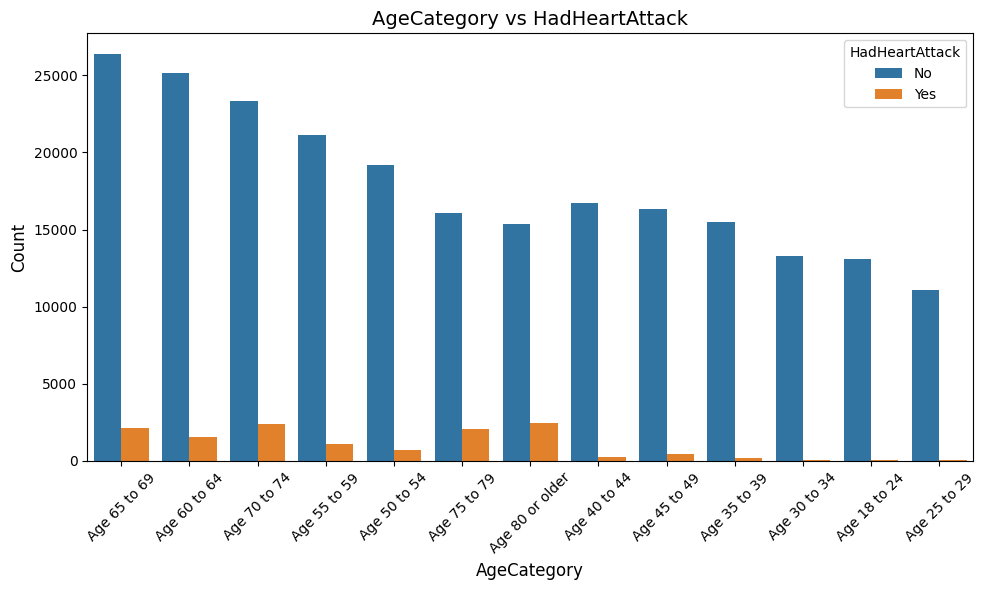

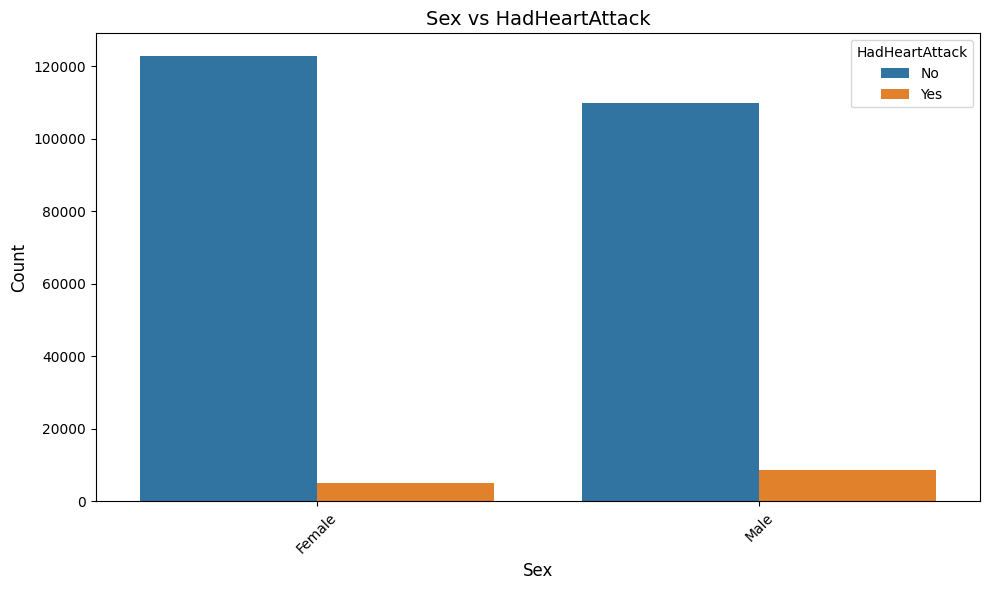

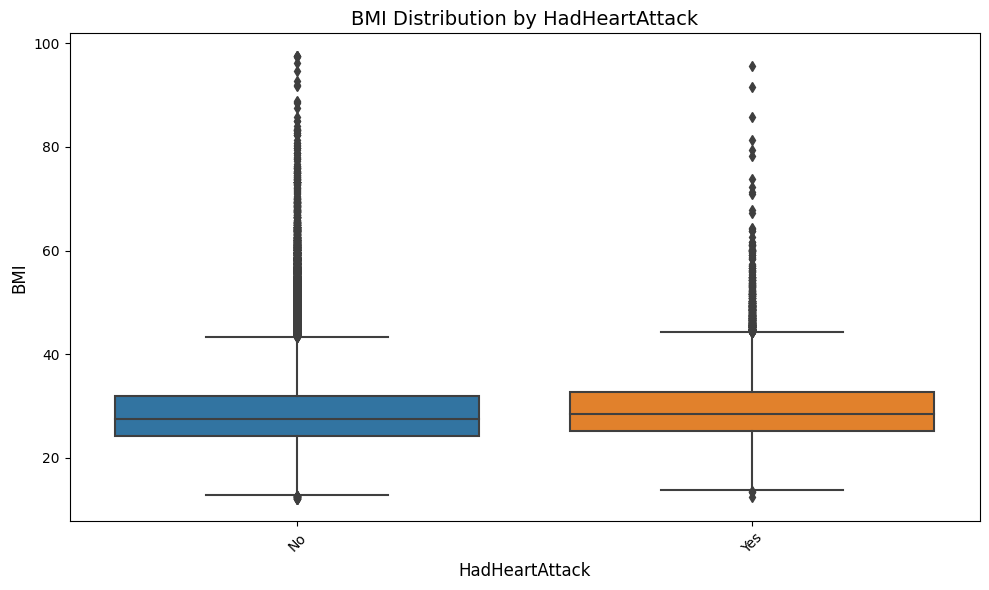

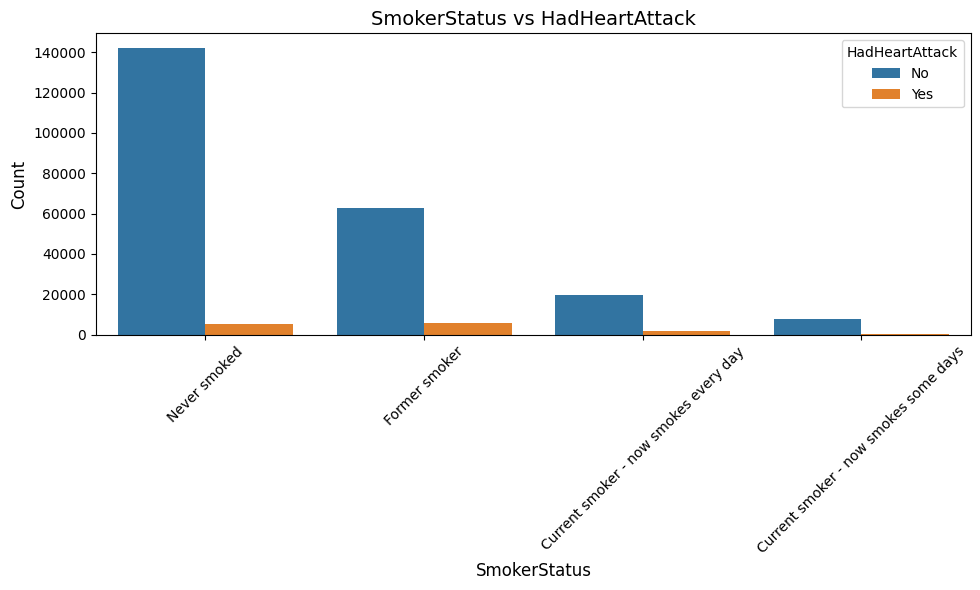

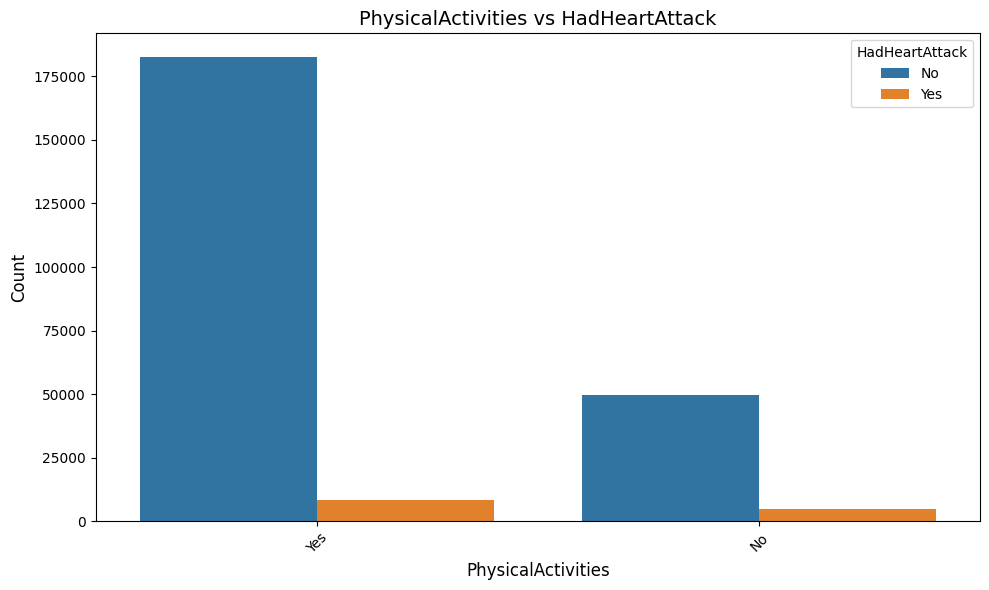

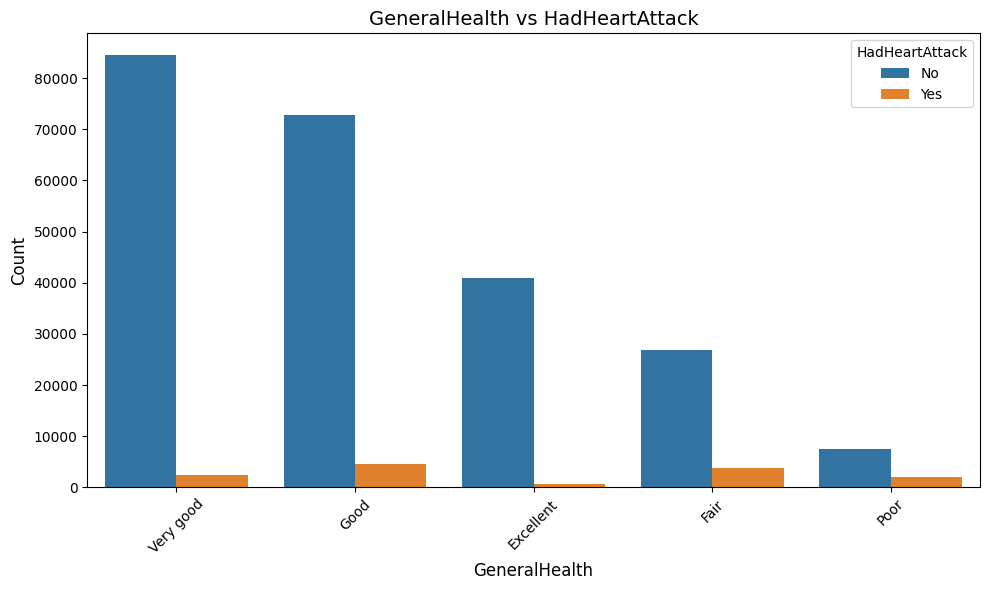

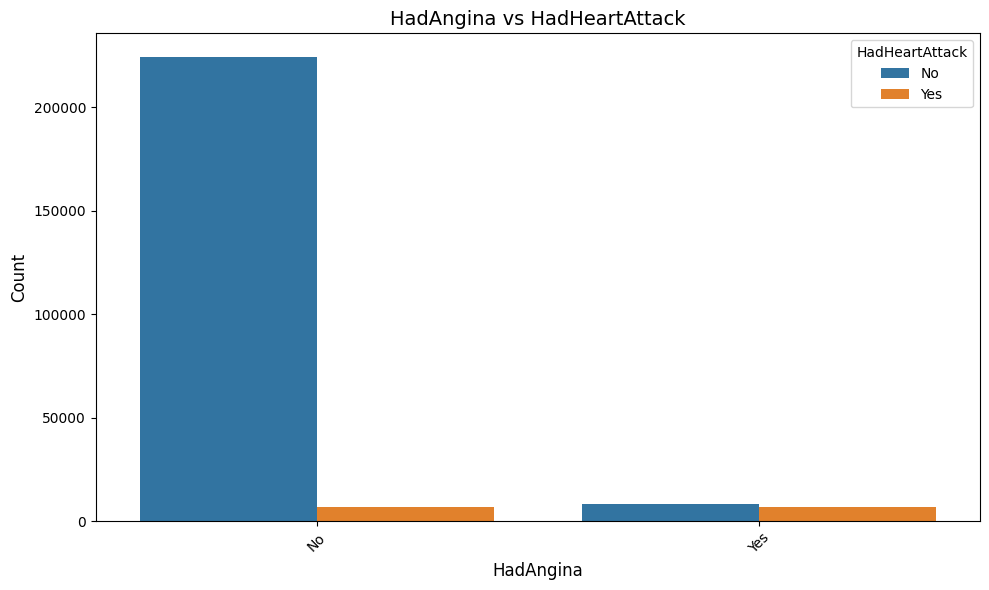

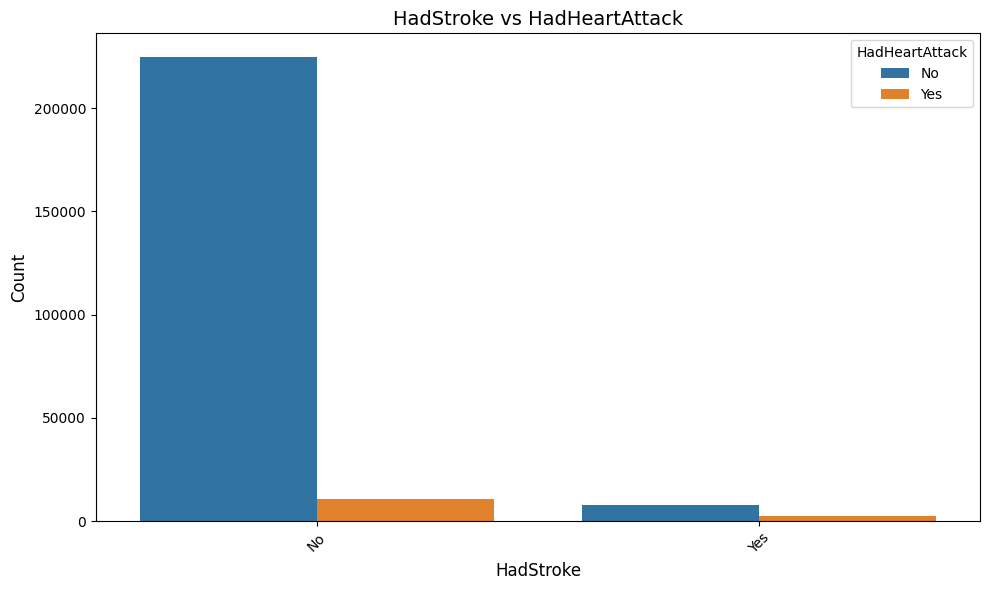

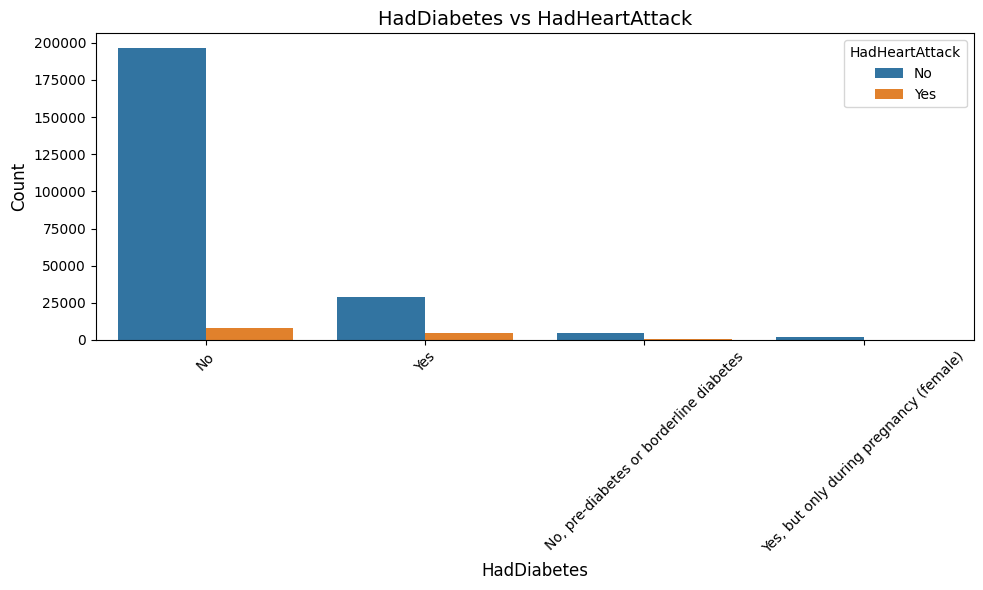

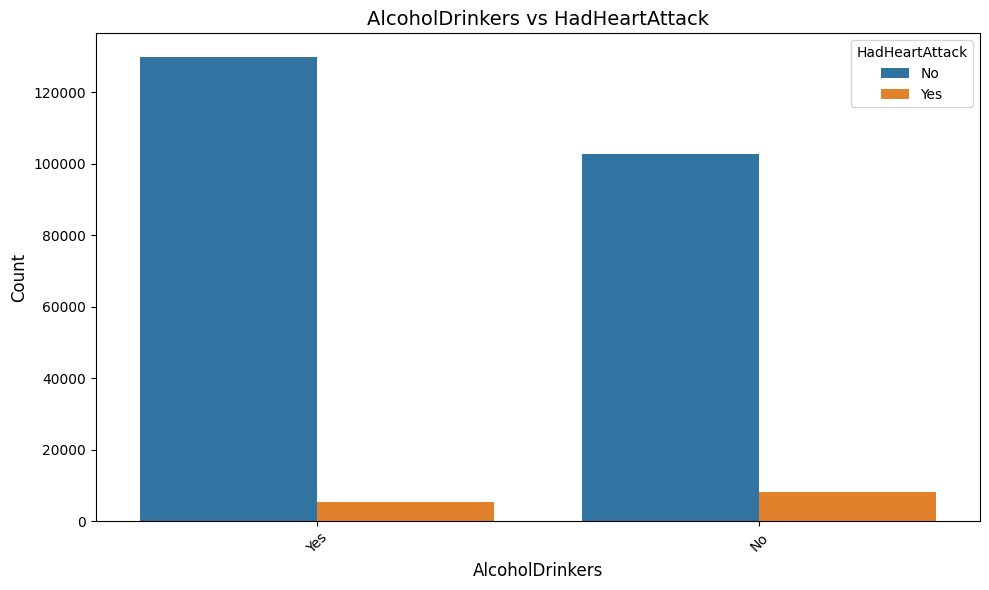

In [10]:
# Ensure 'HadHeartAttack' is present in the dataset
target = 'HadHeartAttack'

# Define a subset of key features for visualization (based on prior analysis)
key_features = [
    'AgeCategory', 'Sex', 'BMI', 'SmokerStatus', 'PhysicalActivities',
    'GeneralHealth', 'HadAngina', 'HadStroke', 'HadDiabetes', 'AlcoholDrinkers'
]

# Visualize feature-target relationships
for feature in key_features:
    plt.figure(figsize=(10, 6))
    
    if df[feature].dtype == 'object':  # Categorical features
        sns.countplot(data=df, x=feature, hue=target, order=df[feature].value_counts().index)
        plt.title(f'{feature} vs {target}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Count', fontsize=12)
    else:  # Numeric features
        sns.boxplot(data=df, x=target, y=feature)
        plt.title(f'{feature} Distribution by {target}', fontsize=14)
        plt.xlabel(target, fontsize=12)
        plt.ylabel(feature, fontsize=12)
    
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()

    # Save the plot to a PNG file
    # filename = f'{feature}_vs_HadHeartAttack.png'
    # plt.savefig(filename, dpi=300)
    
    plt.show()


## Numerical Feature Improvements Based on Graphs

Analyzing these visualizations, here are the feature-specific observations and recommendations to improve the graphs and their utility in modeling:

1. **SmokerStatus vs HadHeartAttack**: Smokers, particularly current smokers, show a higher proportion of heart attacks compared to non-smokers.
   - Recommendation: 
     - Group rare categories such as "smokes some days" into broader groups to reduce noise.
     - Consider encoding this variable into ordinal categories such as `Never Smoked (0)`, `Former Smoker (1)`, `Current Smoker (2)`.

2. **Sex vs HadHeartAttack**: There is a difference in heart attack occurrences between males and females, with males showing a slightly higher proportion.
   - Recommendation:
     - Retain the binary encoding of this variable (`0` for female and `1` for male) as it seems predictive.
     - Ensure balanced sampling across genders if the dataset is imbalanced.

3. **PhysicalActivities vs HadHeartAttack**: Individuals who do not engage in physical activities appear to have a higher proportion of heart attacks.
   - Recommendation:
     - Keep this variable as a binary flag. 
     - Create an interaction term between this feature and other health-related metrics (e.g., BMI or AgeCategory) for potentially better prediction.

4. **HadStroke vs HadHeartAttack**: Having a history of stroke correlates strongly with heart attacks.
   - Recommendation:
     - Maintain this variable as it appears highly predictive.
     - Consider using this as part of a composite health score with other conditions like diabetes and angina.

5. **HadDiabetes vs HadHeartAttack**: A clear increase in heart attacks among individuals with diabetes.
   - Recommendation:
     - Combine categories such as "Yes, but only during pregnancy" into a general "Yes" to simplify and increase sample size per category.

6. **HadAngina vs HadHeartAttack**: There is a strong correlation between angina and heart attacks.
   - Recommendation:
     - Keep this binary variable as-is due to its strong signal.
     - Include this in any health risk aggregation features or models.

7. **GeneralHealth vs HadHeartAttack**: As perceived health declines (e.g., "Fair" or "Poor"), the likelihood of heart attacks increases.
   - Recommendation:
     - Convert this ordinal feature into a numerical scale (`Excellent=5`, `Very good=4`, ..., `Poor=1`) for better incorporation in models.
     - Use as part of interaction terms with age or physical activity.

8. **BMI vs HadHeartAttack**: Higher BMI values show a slight correlation with heart attacks. Outliers are present in the upper BMI range.
   - Recommendation:
     - Normalize BMI and consider capping extreme outliers to reduce their influence.
     - Create categories such as `Underweight`, `Normal`, `Overweight`, `Obese` for modeling purposes if non-linearity is suspected.

9. **AlcoholDrinkers vs HadHeartAttack**: There is no significant difference in heart attack occurrences between drinkers and non-drinkers.
   - Recommendation:
     - If this variable doesn't improve the model's performance, consider excluding it or combining it with other lifestyle features for composite effects.

10. **AgeCategory vs HadHeartAttack**: Older age groups have a higher proportion of heart attacks.
   - Recommendation:
     - Encode age groups into numerical categories (e.g., `0-25 = 1`, ..., `80+ = 7`).
     - Consider using this variable in interaction terms with health conditions like diabetes and physical activity.

**General Recommendations**:
- **Feature Engineering**:
  - Create composite scores by combining related features, such as a "Health Risk Index" using variables like `HadDiabetes`, `HadStroke`, and `GeneralHealth`.
  - Introduce polynomial features or interaction terms if non-linear relationships are suspected.
  
- **Preprocessing**:
  - Normalize continuous variables (e.g., BMI, Age).
  - Impute missing values for categorical variables to avoid dropping potentially useful data.

- **Modeling**:
  - Test tree-based models like Random Forest or Gradient Boosting, as they can capture interactions and non-linear effects without manual feature engineering.
  - Use feature selection techniques to retain only the most predictive features.

These strategies should help in improving both the predictive power of the features and the clarity of the visualizations for exploratory analysis.

## Ordinal Encoding

In [11]:
# Create a new feature 'AgesGrouped' as a copy of 'AgeCategory'
df['AgesGrouped'] = df['AgeCategory']

In [12]:
# Define ordinal mappings for each feature
ordinal_mappings = {
    "GeneralHealth": {
        'Poor': 1,
        'Fair': 2,
        'Good': 3,
        'Very good': 4,
        'Excellent': 5
    },
    "LastCheckupTime": {
        '5 or more years ago': 1,
        'Within past 5 years (2 years but less than 5 years ago)': 2,
        'Within past 2 years (1 year but less than 2 years ago)': 3,
        'Within past year (anytime less than 12 months ago)': 4
    },
    "RemovedTeeth": {
        'None of them': 0,
        '1 to 5': 1,
        '6 or more, but not all': 2,
        'All': 3
    },
    "HadDiabetes": {
        'No': 0,
        'No, pre-diabetes or borderline diabetes': 1,
        'Yes, but only during pregnancy (female)': 2,
        'Yes': 3
    },
    "SmokerStatus": {
        'Never smoked': 0,
        'Former smoker': 1,
        'Current smoker - now smokes some days': 2,
        'Current smoker - now smokes every day': 3
    },
    "ECigaretteUsage": {
        'Never used e-cigarettes in my entire life': 0,
        'Not at all (right now)': 1,
        'Use them some days': 2,
        'Use them every day': 3
    },
    "AgeCategory": {
        'Age 18 to 24': 1,
        'Age 25 to 29': 2,
        'Age 30 to 34': 3,
        'Age 35 to 39': 4,
        'Age 40 to 44': 5,
        'Age 45 to 49': 6,
        'Age 50 to 54': 7,
        'Age 55 to 59': 8,
        'Age 60 to 64': 9,
        'Age 65 to 69': 10,
        'Age 70 to 74': 11,
        'Age 75 to 79': 12,
        'Age 80 or older': 13
    },
    "TetanusLast10Tdap": {
        'No, did not receive any tetanus shot in the past 10 years': 1,
        'Yes, received tetanus shot but not sure what type': 2,
        'Yes, received tetanus shot, but not Tdap': 3,
        'Yes, received Tdap': 4
    },
    "CovidPos": {
        'No': 0,
        'Yes': 1,
        'Tested positive using home test without a health professional': 1
    }
}

# Apply ordinal encoding to the specified features
for column, mapping in ordinal_mappings.items():
    df[column] = df[column].map(mapping)

# Verify the changes
print(df[list(ordinal_mappings.keys())].head())

   GeneralHealth  LastCheckupTime  RemovedTeeth  HadDiabetes  SmokerStatus  \
0              4                4             0            0             1   
1              4                4             0            3             1   
2              4                4             2            0             1   
3              2                4             0            0             0   
4              3                4             1            0             0   

   ECigaretteUsage  AgeCategory  TetanusLast10Tdap  CovidPos  
0                0           10                  4         0  
1                0           11                  2         0  
2                0           12                  1         1  
3                0           13                  1         1  
4                0           13                  1         0  


## One-Hot Encoding

In [13]:
import pandas as pd

# Excluded features for ordinal encoding
excluded_features = [
    'GeneralHealth',
    'LastCheckupTime',
    'RemovedTeeth',
    'HadDiabetes',
    'SmokerStatus',
    'ECigaretteUsage',
    'AgeGrouped',
    'AgeCategory',
    'State',
    'TetanusLast10Tdap'
]

# Identify features to one-hot encode
one_hot_features = [col for col in categorical_columns if col not in excluded_features]

# One-hot encode the selected features and ensure the output is 0/1
df = pd.get_dummies(df, columns=one_hot_features, drop_first=True)

# Rename binary one-hot encoded columns to match the original feature names
for feature in one_hot_features:
    yes_col = f"{feature}_Yes"  # Check for "_Yes" columns
    if yes_col in df.columns:
        df.rename(columns={yes_col: feature}, inplace=True)

In [14]:
# Convert all boolean values in the DataFrame to integers (0/1)
df = df.astype({col: int for col in df.select_dtypes(include=['bool']).columns})

## Train/Test Split

In [15]:
X = df.drop(columns=['HadHeartAttack'])  
y = df['HadHeartAttack'] 

In [16]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

## Feature Engineering

#### New Features Explained:
1. `ComorbidityIndex`: Counts the number of chronic conditions a person has (e.g., Angina, Stroke, etc.).
2. `AgeMidpoint`: Converts the AgeCategory into a numeric midpoint for easier analysis.
3. `ExerciseRegularity`: Combines physical activity participation with sleep hours to estimate overall exercise regularity.
4. `HealthAwarenessIndex`: Counts the number of preventive measures taken (e.g., vaccines, HIV testing).
5. `ObesityClass`: Categorizes BMI into standard obesity classes (Underweight, Normal weight, etc.).

In [17]:
def feature_engineering(data):
    # 1. Comorbidity Index
    chronic_conditions = [
        'HadAngina', 'HadStroke', 'HadCOPD', 'HadDepressiveDisorder', 
        'HadKidneyDisease', 'HadArthritis', 'HadDiabetes'
    ]
    data['ComorbidityIndex'] = data[chronic_conditions].apply(lambda x: x.eq('Yes').sum(), axis=1)

    # 2. Age Group Numeric
    age_map = {
        'Age 18 to 24': 21, 'Age 25 to 29': 27, 'Age 30 to 34': 32,
        'Age 35 to 39': 37, 'Age 40 to 44': 42, 'Age 45 to 49': 47,
        'Age 50 to 54': 52, 'Age 55 to 59': 57, 'Age 60 to 64': 62,
        'Age 65 to 69': 67, 'Age 70 to 74': 72, 'Age 75 to 79': 77,
        'Age 80 or older': 85
    }
    data['AgeMidpoint'] = data['AgesGrouped'].map(age_map)

    # Handle missing AgeMidpoint
    if data['AgeMidpoint'].isna().any():
        print("Missing AgeMidpoint values detected!")
        data['AgeMidpoint'] = data['AgeMidpoint'].fillna(data['AgeMidpoint'].median())  # Replace NaN with median

    # 3. Exercise Regularity
    data['ExerciseRegularity'] = data['PhysicalActivities'].apply(lambda x: 1 if x == 'Yes' else 0) * data['SleepHours']
    data['ExerciseRegularity'] = data['ExerciseRegularity'].replace([float('inf'), -float('inf')], float('nan'))
    data['ExerciseRegularity'] = data['ExerciseRegularity'].fillna(0)

    # 4. Health Awareness Index
    preventive_measures = ['FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HIVTesting']
    data['HealthAwarenessIndex'] = data[preventive_measures].apply(lambda x: x.eq('Yes').sum(), axis=1)

    # 5. Obesity Class
    def classify_bmi(bmi):
        if pd.isna(bmi):  # Handle missing BMI
            return 'Unknown'
        elif bmi < 18.5:
            return 'Underweight'
        elif 18.5 <= bmi < 24.9:
            return 'Normal weight'
        elif 25 <= bmi < 29.9:
            return 'Overweight'
        else:
            return 'Obesity'
    data['ObesityClass'] = data['BMI'].apply(classify_bmi)

    return data


# Apply feature engineering to train and test sets
X_train = feature_engineering(X_train)
X_test = feature_engineering(X_test)

## Encoding of the `State` Feature

In [18]:
from category_encoders import TargetEncoder
import pandas as pd

# Ensure 'State' is a string-type column
X_train['State'] = X_train['State'].astype(str)
X_test['State'] = X_test['State'].astype(str)

# Ensure y_train is a Pandas Series (force it before encoding)
y_train = pd.Series(y_train, index=X_train.index, dtype=float)  # Explicitly enforce dtype

# Initialize TargetEncoder
encoder = TargetEncoder(cols=['State'])

# Fit and transform training data
X_train['State_encoded'] = encoder.fit_transform(X_train[['State']], y_train.astype(float))  # Ensure float type

# Transform test data
X_test['State_encoded'] = encoder.transform(X_test[['State']])

# Drop original 'State' column
X_train.drop(columns=['State'], inplace=True)
X_test.drop(columns=['State'], inplace=True)

## Feature Selection / Mutual Information


Remove remaininb `object` features as they are not needed.

In [19]:
# Drop all object (categorical/string) columns from X_train and X_test
X_train = X_train.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])

Calculate MI scores.

In [20]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information
mi_scores = mutual_info_classif(X_train, y_train)

# Create a DataFrame for results
mi_results = pd.DataFrame({
    'Feature': X_train.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

# Select top features (e.g., top 20)
top_n = 20
top_mi_results = mi_results.head(top_n)  # Keep as a DataFrame

Graph of the top 20 MI scores.

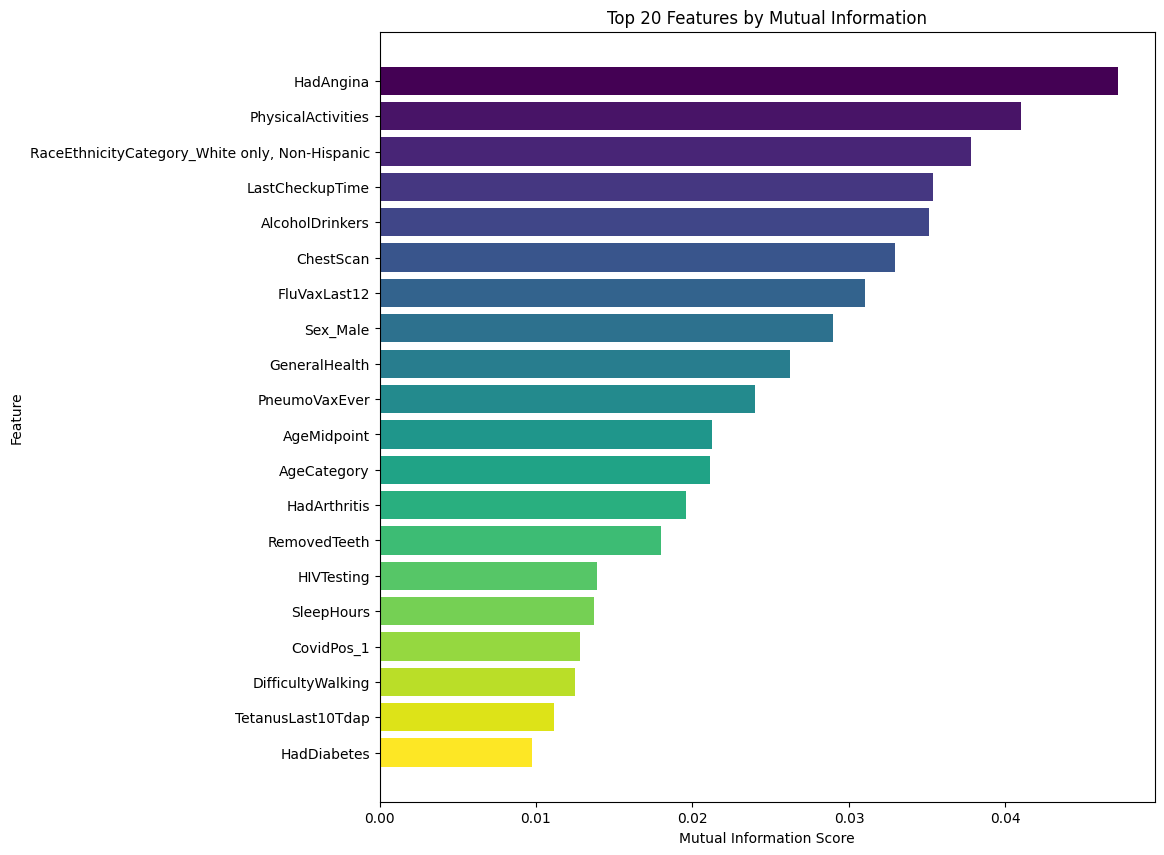

In [21]:
# Generate colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, top_n))  # Change 'viridis' to another colormap if needed

# Plot bar chart with a colormap
plt.figure(figsize=(10, 10))
plt.barh(top_mi_results['Feature'], top_mi_results['MI_Score'], color=colors)
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.title(f"Top {top_n} Features by Mutual Information")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

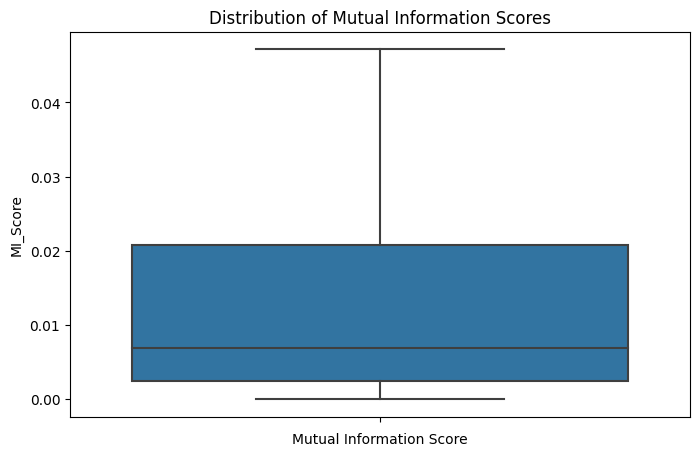

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=mi_results['MI_Score'])
plt.title("Distribution of Mutual Information Scores")
plt.xlabel("Mutual Information Score")
plt.show()


Select the top 14 features.

In [23]:
# Ensure top_features contains the top 14 features
top_n = 14
top_features = mi_results.head(top_n)['Feature'].tolist()  # Convert Series to list

# Filter X_train and X_test to include only top features
X_train = X_train[top_features]
X_test = X_test[top_features]

# Verify the selection
print(f"Selected top {top_n} features:", top_features)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Selected top 14 features: ['HadAngina', 'PhysicalActivities', 'RaceEthnicityCategory_White only, Non-Hispanic', 'LastCheckupTime', 'AlcoholDrinkers', 'ChestScan', 'FluVaxLast12', 'Sex_Male', 'GeneralHealth', 'PneumoVaxEver', 'AgeMidpoint', 'AgeCategory', 'HadArthritis', 'RemovedTeeth']
X_train shape: (196817, 14)
X_test shape: (49205, 14)


## SMOTE?

In [24]:
# TODO:

## Scaling Data

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to all numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns  # Select only numerical columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [26]:
X_train.head()

,HadAngina,PhysicalActivities,"RaceEthnicityCategory_White only, Non-Hispanic",LastCheckupTime,AlcoholDrinkers,ChestScan,FluVaxLast12,Sex_Male,GeneralHealth,PneumoVaxEver,AgeMidpoint,AgeCategory,HadArthritis,RemovedTeeth
75129,0,1,1,4,1,0,0,1,4,0,27,2,0,0
245692,0,1,0,2,1,0,0,0,3,0,27,2,0,1
192955,0,1,0,4,0,0,0,0,3,0,62,9,1,0
109572,0,1,0,4,1,0,0,1,3,0,42,5,0,0
219652,0,0,0,3,0,0,1,0,2,0,62,9,1,3


# <span style="color:#5E6997">Predict Heart Attacks</span> <a class="anchor" id="predict"></a>

## Define a Function to Evaluate Models

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model_performance(model, X_test, y_test):
    """
    Evaluates model performance, plots the ROC curve and confusion matrix, 
    and saves them with dynamic file names based on the model's class name.

    Parameters:
    - model: Trained model object (supports `predict_proba`, `decision_function`, or TensorFlow's `predict`).
    - X_test: Test feature set.
    - y_test: Test target set.
    """
    # Determine the model name
    if hasattr(model, "__class__"):
        model_name = model.__class__.__name__.lower()
    else:
        model_name = "tensorflow_model"

    # Handle prediction probabilities
    try:
        if hasattr(model, "predict_proba"):  # Scikit-learn models with predict_proba
            y_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):  # Scikit-learn models with decision_function
            y_proba = model.decision_function(X_test)
        elif hasattr(model, "predict"):  # TensorFlow models
            y_proba = model.predict(X_test).ravel()  # Flatten probabilities for binary classification
        else:
            raise AttributeError(f"The model {model_name} does not support the necessary prediction methods.")
    except Exception as e:
        raise RuntimeError(f"Error in generating predictions: {e}")

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    # Plot the ROC curve
    print(f'Model Name: {model_name}')
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")

    # Save the ROC curve with dynamic name
    roc_filename = f"roc_curve_{model_name}.png"
    plt.savefig(roc_filename, dpi=300, bbox_inches='tight')

    plt.show()

    # Print AUC
    print(f"AUC: {auc:.3f}")

    # Convert probabilities to binary predictions for confusion matrix and classification report
    y_pred = (y_proba >= 0.5).astype(int)

    # Evaluate the model with confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)

    # Print report
    print("\nClassification Report:")
    print(report)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Stroke', 'Stroke'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title("Confusion Matrix Heatmap")

    # Save the confusion matrix heatmap with dynamic name
    cm_filename = f"cmatrix_{model_name}.png"
    plt.savefig(cm_filename, dpi=300, bbox_inches='tight')

    plt.show()
    print('-' * 55 + '\n\n')


## Base Models

Model Name: logisticregression


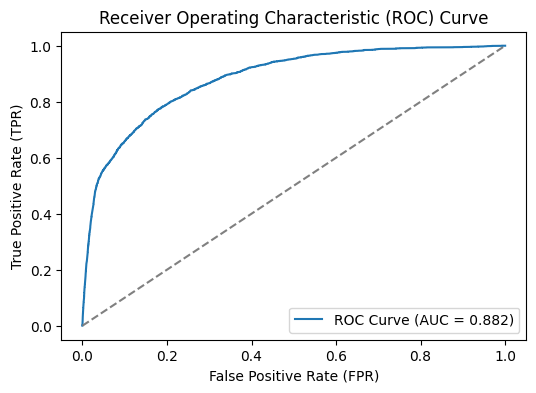

AUC: 0.882

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46518
           1       0.56      0.25      0.34      2687

    accuracy                           0.95     49205
   macro avg       0.76      0.62      0.66     49205
weighted avg       0.94      0.95      0.94     49205



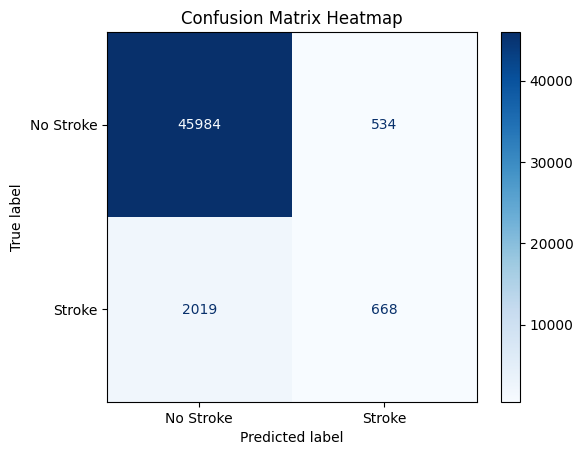

-------------------------------------------------------


Model Name: randomforestclassifier


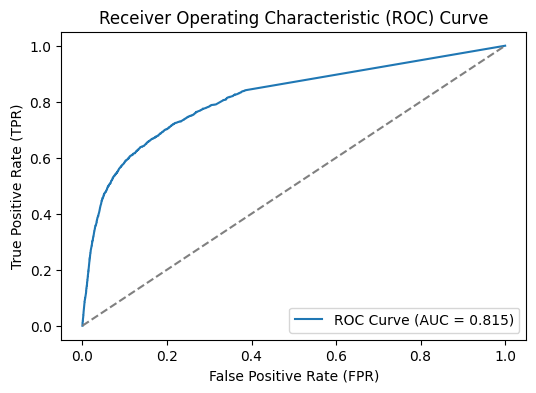

AUC: 0.815

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     46518
           1       0.45      0.23      0.30      2687

    accuracy                           0.94     49205
   macro avg       0.70      0.61      0.64     49205
weighted avg       0.93      0.94      0.93     49205



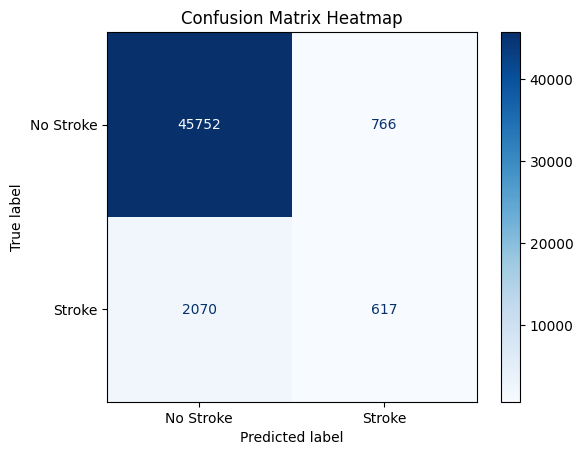

-------------------------------------------------------


Model Name: gradientboostingclassifier


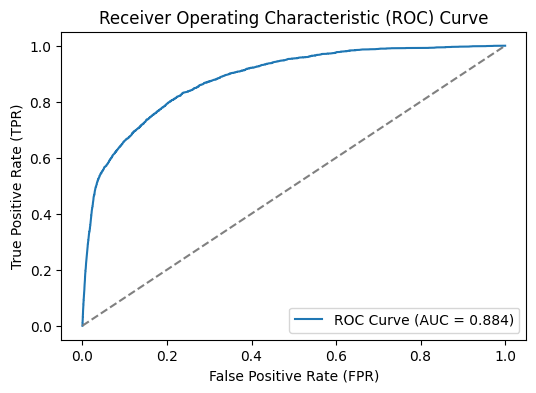

AUC: 0.884

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46518
           1       0.60      0.22      0.32      2687

    accuracy                           0.95     49205
   macro avg       0.78      0.61      0.65     49205
weighted avg       0.94      0.95      0.94     49205



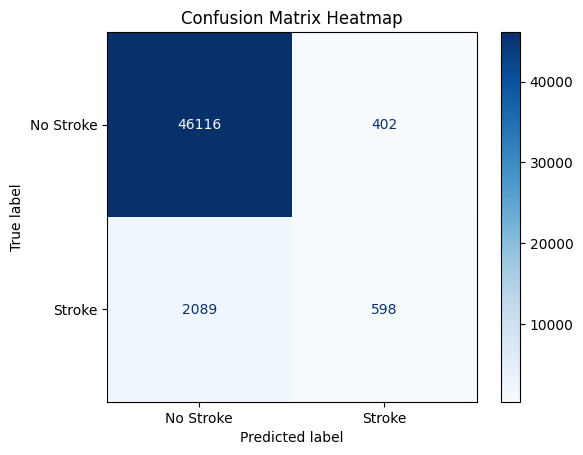

-------------------------------------------------------




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Name: linearsvc


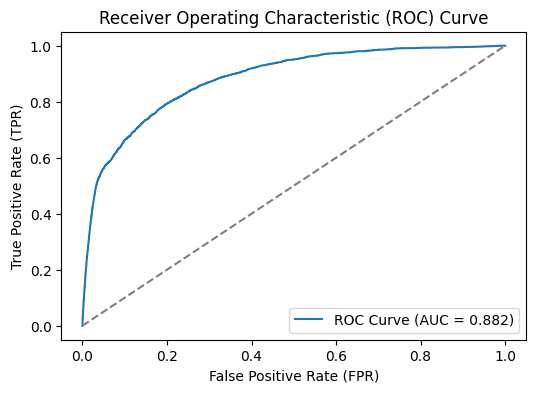

AUC: 0.882

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46518
           1       1.00      0.00      0.00      2687

    accuracy                           0.95     49205
   macro avg       0.97      0.50      0.49     49205
weighted avg       0.95      0.95      0.92     49205



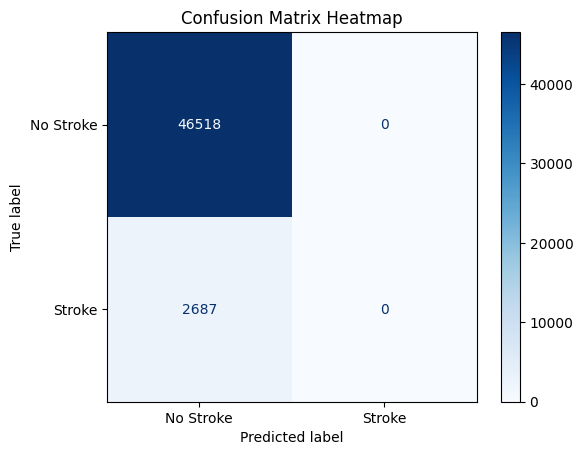

-------------------------------------------------------




In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Initialize base models
models = [
    LogisticRegression(max_iter=1000, random_state=0),
    RandomForestClassifier(random_state=0),
    GradientBoostingClassifier(random_state=0),
    LinearSVC(max_iter=100000, random_state=0)
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    evaluate_model_performance(model, X_test, y_test)


### Tensorflow Base Model

Epoch 1/10
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9342 - loss: 0.2411 - val_accuracy: 0.9477 - val_loss: 0.1500
Epoch 2/10
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9469 - loss: 0.1535 - val_accuracy: 0.9479 - val_loss: 0.1520
Epoch 3/10
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9468 - loss: 0.1516 - val_accuracy: 0.9477 - val_loss: 0.1492
Epoch 4/10
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9468 - loss: 0.1482 - val_accuracy: 0.9470 - val_loss: 0.1491
Epoch 5/10
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9478 - loss: 0.1489 - val_accuracy: 0.9472 - val_loss: 0.1491
Epoch 6/10
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9469 - loss: 0.1494 - val_accuracy: 0.9466 - val_loss: 0.1509
Epoch 7/10
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9476 - loss: 0.1478 - val_accuracy: 0.9474 - val_loss: 0.1497
Epoch 8/10
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9475 - loss: 0

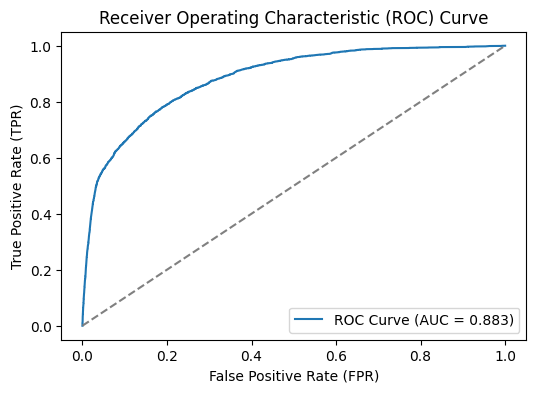

AUC: 0.883

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46518
           1       0.59      0.21      0.31      2687

    accuracy                           0.95     49205
   macro avg       0.77      0.60      0.64     49205
weighted avg       0.94      0.95      0.94     49205



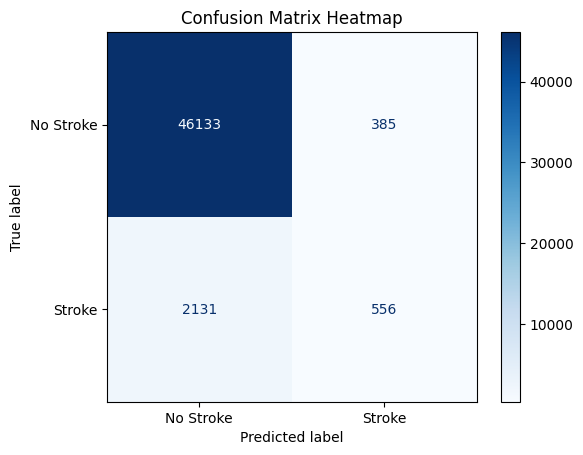

-------------------------------------------------------




In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define a TensorFlow model
def create_tensorflow_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),  # Explicit Input layer
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize and train the TensorFlow model
tensorflow_model = create_tensorflow_model(X_train.shape[1])
tensorflow_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the TensorFlow model
loss, accuracy = tensorflow_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

evaluate_model_performance(tensorflow_model, X_test, y_test)

### How I Will Improving Models in the Fine-Tuning Process:
1. **Hyperparameter Tuning**: Use GridSearchCV to optimize hyperparameters for each model.      
2. **Cross-Validation**: Use cross-validation (cross_val_score) to ensure robust evaluation and avoid overfitting to the train-test split.

3. **Ensemble Methods**: Combine multiple models using VotingClassifier or StackingClassifier to leverage the strengths of individual models.

4. **Feature Engineering**: Analyze and transform features to extract more predictive information (e.g., polynomial features, interactions, feature selection).

5. **Threshold Tuning**: Adjust the classification threshold for each model to balance precision and recall.

6. **Tensorflow Model**: Increase model capacity, experiment with layer types, optimize training, and regularization.

## Tuned Logistic Regression Model

Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best ROC AUC for Logistic Regression: 0.8819211411982486

TEST DATA RESULTS
Model Name: gridsearchcv


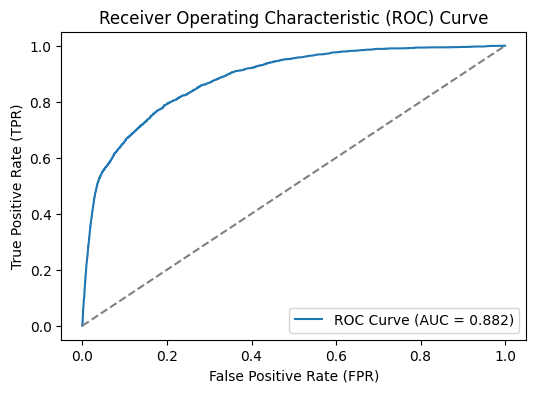

AUC: 0.882

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90     46518
           1       0.20      0.77      0.32      2687

    accuracy                           0.82     49205
   macro avg       0.59      0.80      0.61     49205
weighted avg       0.94      0.82      0.87     49205



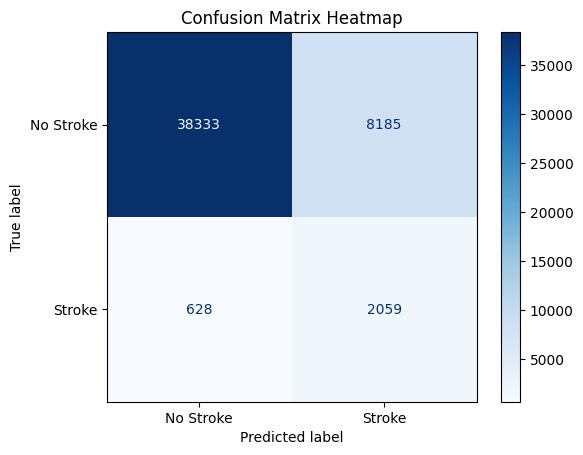

-------------------------------------------------------




In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid for Logistic Regression
param_tuned_lr = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithms
}

# Initialize model
lr = LogisticRegression(max_iter=1000, random_state=0, class_weight='balanced')

# Grid search
tuned_lr = GridSearchCV(lr, param_tuned_lr, scoring='roc_auc', cv=5, n_jobs=-1)
tuned_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", tuned_lr.best_params_)
print("Best ROC AUC for Logistic Regression:", tuned_lr.best_score_)
# Evaluate the model
print("\nTEST DATA RESULTS")
evaluate_model_performance(tuned_lr, X_test, y_test)


**Logistic Regression Test Results**\
AUC: 0.880

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.82      0.90     46518
           1       0.20      0.76      0.31      2687

    accuracy                           0.82     49205
    macro avg      0.59      0.79      0.60     49205
    weighted avg   0.94      0.82      0.86     49205

## Tuned Random Forest Model

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC AUC for Random Forest: 0.8792648139059244

TEST DATA RESULTS
Model Name: gridsearchcv


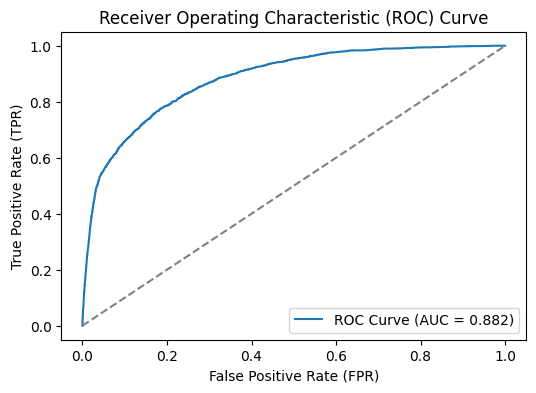

AUC: 0.882

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     46518
           1       0.20      0.77      0.31      2687

    accuracy                           0.81     49205
   macro avg       0.59      0.79      0.60     49205
weighted avg       0.94      0.81      0.86     49205



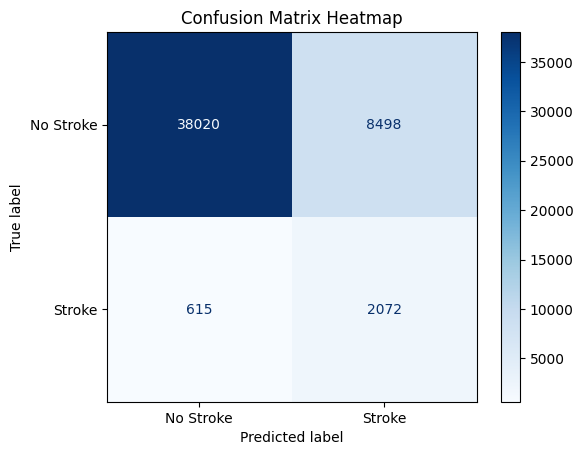

-------------------------------------------------------




In [31]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for Random Forest
param_tuned_rf = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [None, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum samples required to split
    'min_samples_leaf': [1, 2],  # Minimum samples required per leaf node
}

# Initialize model
rf = RandomForestClassifier(random_state=0, class_weight='balanced')

# Grid search
tuned_rf = GridSearchCV(rf, param_tuned_rf, scoring='roc_auc', cv=5, n_jobs=1)
tuned_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", tuned_rf.best_params_)
print("Best ROC AUC for Random Forest:", tuned_rf.best_score_)
# Evaluate the model
print("\nTEST DATA RESULTS")
evaluate_model_performance(tuned_rf, X_test, y_test)

**Random Forest Test Results**\
AUC: 0.879

Classification Report:
              
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     46518
           1       0.19      0.76      0.31      2687

    accuracy                           0.81     49205
    macro avg      0.59      0.79      0.60     49205
    weighted avg   0.94      0.81      0.86     49205

## Tuned Gradient Boosting Model

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best ROC AUC for Gradient Boosting: 0.883128577832802

TEST DATA RESULTS
Model Name: gridsearchcv


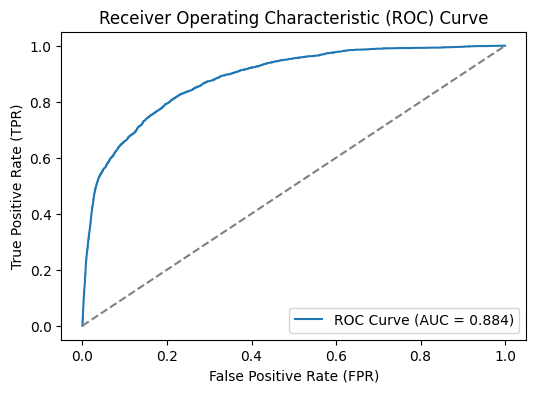

AUC: 0.884

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46518
           1       0.61      0.22      0.33      2687

    accuracy                           0.95     49205
   macro avg       0.78      0.61      0.65     49205
weighted avg       0.94      0.95      0.94     49205



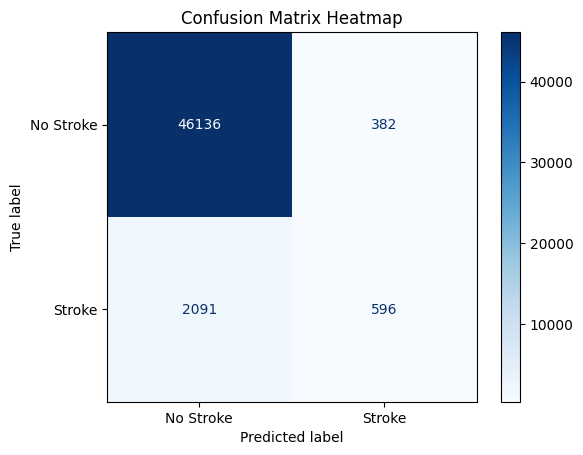

-------------------------------------------------------




In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid for Gradient Boosting
param_tuned_gb = {
    'learning_rate': [0.01, 0.1, 0.2],  # Step size at each iteration
    'n_estimators': [100, 200, 500],  # Number of boosting stages
    'max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
}

# Initialize model
gb = GradientBoostingClassifier(random_state=0)

# Grid search
tuned_gb = GridSearchCV(gb, param_tuned_gb, scoring='roc_auc', cv=5, n_jobs=-1)
tuned_gb.fit(X_train, y_train)

print("Best parameters for Gradient Boosting:", tuned_gb.best_params_)
print("Best ROC AUC for Gradient Boosting:", tuned_gb.best_score_)
# Evaluate the model
print("\nTEST DATA RESULTS")
evaluate_model_performance(tuned_gb, X_test, y_test)

**Gradient Boosting Test Results**\
AUC: 0.882

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46518
           1       0.59      0.20      0.30      2687

    accuracy                           0.95     49205
    macro avg      0.78      0.60      0.64     49205
    weighted avg   0.94      0.95      0.94     49205


## Tuned SVM Model

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters for Linear SVM: {'C': 0.01}
Best ROC AUC for Linear SVM: 0.8816051764939316

TEST DATA RESULTS
Model Name: gridsearchcv


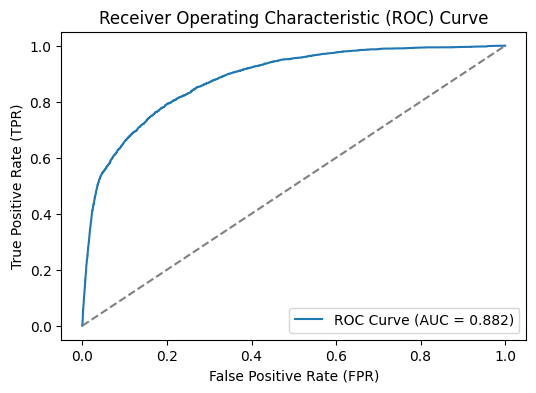

AUC: 0.882

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     46518
           1       0.44      0.51      0.47      2687

    accuracy                           0.94     49205
   macro avg       0.71      0.74      0.72     49205
weighted avg       0.94      0.94      0.94     49205



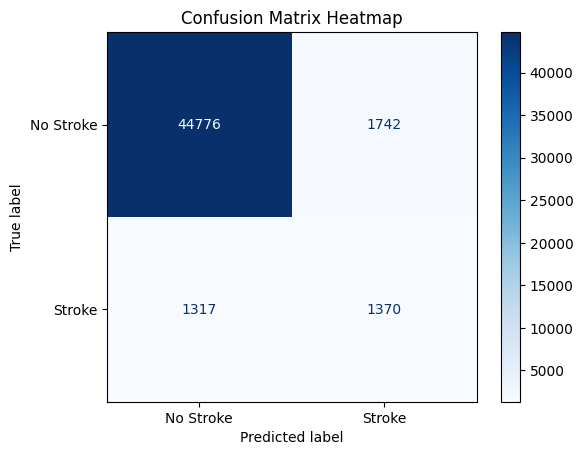

-------------------------------------------------------




In [33]:
from sklearn.svm import LinearSVC

# Define parameter grid for Linear SVM
param_tuned_svm = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
}

# Initialize model
svm = LinearSVC(max_iter=10000, random_state=0, class_weight='balanced')

# Grid search
tuned_svm = GridSearchCV(svm, param_tuned_svm, scoring='roc_auc', cv=5, n_jobs=-1)
tuned_svm.fit(X_train, y_train)

print("Best parameters for Linear SVM:", tuned_svm.best_params_)
print("Best ROC AUC for Linear SVM:", tuned_svm.best_score_)
# Evaluate the model
print("\nTEST DATA RESULTS")
evaluate_model_performance(tuned_svm, X_test, y_test)

**SVM Test Results**\
AUC: 0.880

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     46518
           1       0.21      0.75      0.32      2687

    accuracy                           0.83     49205
    macro avg      0.59      0.79      0.61     49205
    weighted avg   0.94      0.83      0.87     49205

# <span style="color:#5E6997">Conclusion</span> <a class="anchor" id="conclusion"></a>